In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

DATA

In [174]:
df =pd.read_csv('data/force2020_data_unsupervised_learning.csv')

In [175]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [176]:
features = ['RHOB', 'NPHI']

PREPROCESSING DATA

In [177]:
df = df.dropna(subset=features)

In [178]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [179]:
data =df[features].copy()

In [180]:
data

,RHOB,NPHI
4238,1.774626,0.765867
4239,1.800986,0.800262
4240,1.817696,0.765957
4241,1.829333,0.702521
4242,1.813854,0.639708
...,...,...
18265,2.630211,0.187811
18266,2.643114,0.185574
18267,2.681300,0.176074
18268,2.738337,0.174617


NORMALIZING DATA

In [181]:
data = ((data-data.min()) / (data.max() - data.min())) * 9 + 1
data

,RHOB,NPHI
4238,2.764332,9.601053
4239,2.929717,10.000000
4240,3.034558,9.602097
4241,3.107571,8.866305
4242,3.010451,8.137735
...,...,...
18265,8.132349,2.896205
18266,8.213302,2.870265
18267,8.452886,2.760068
18268,8.810741,2.743174


GETTING RANDOM CENTROIDS

In [182]:
def random_cenroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [183]:
centroids = random_cenroids(data, 3)
centroids

C:\Users\Edzel\AppData\Local\Temp\ipykernel_4904\3240149550.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2
RHOB,7.489614,7.821924,6.261112
NPHI,6.238065,4.306581,2.606514


CLUSTERING: CALCULATING EUCLIDEAN DISTANCE RELATIVE TO THE CENTROIDS

In [184]:
def get_labels(data, centroids):
    distances = centroids.apply (lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [185]:
labels = get_labels(data, centroids)
labels

4238     0
4239     0
4240     0
4241     0
4242     0
        ..
18265    1
18266    1
18267    1
18268    1
18269    1
Length: 14032, dtype: int64

In [186]:
labels.value_counts()

0    8671
1    3258
2    2103
Name: count, dtype: int64

ADJUSTING THE CENTROIDS

In [187]:
def new_centroid(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [188]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler

In [189]:
data

,RHOB,NPHI
4238,2.764332,9.601053
4239,2.929717,10.000000
4240,3.034558,9.602097
4241,3.107571,8.866305
4242,3.010451,8.137735
...,...,...
18265,8.132349,2.896205
18266,8.213302,2.870265
18267,8.452886,2.760068
18268,8.810741,2.743174


PLOTTING THE CLUSTERS

In [190]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T) # transforming centroids to x and y for plotting
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

ITERATING THE FUNCTION UNTIL CENTROIDS STABILIZE

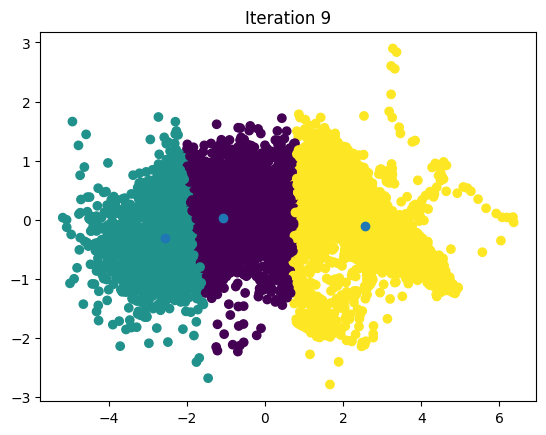

In [191]:
max_iterations = 100
k = 3

centroids = random_cenroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroid(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [192]:
centroids

,0,1,2
RHOB,4.603146,3.300780,7.149991
NPHI,6.173628,6.936916,3.560975
